#                   Linear Regression on Boston Housing dataset

**first we import libraries and read the dataset**

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
boston = pd.read_csv("./boston.csv")

## Data Analysis and Preprocessing

In [47]:
boston.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


### Dataset Description

  
    CRIM - per capita crime rate by town
    ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
    INDUS - proportion of non-retail business acres per town.
    CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    NOX - nitric oxides concentration (parts per 10 million)
    RM - average number of rooms per dwelling
    AGE - proportion of owner-occupied units built prior to 1940
    DIS - weighted distances to five Boston employment centres
    RAD - index of accessibility to radial highways
    TAX - full-value property-tax rate per $10,000
    PTRATIO - pupil-teacher ratio by town
    B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    LSTAT - % lower status of the population
    MEDV - Median value of owner-occupied homes in $1000's [OUR target variable]




boston.info() gives us the idea about the data types of the columns and if there are any null values present in any column

In [48]:
boston.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


*the shape() function of pandas gives us the dimension of our dataset(no of rows, no of columns). we will be using this in several places in our code*

In [49]:
np.shape(boston)

(506, 14)

the describe function provides us with many important statistical values of the individual columns of our dataset such as mean, standard deviation etc. which are helpfull in understanding our data and helps in preprocessing

In [50]:
print(boston.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

Next we find the correlation table of our data.


*boston.corr()* gives the correlation table of the whole dataset. From correlation we get the idea how each column is dependant on each other. If it is negative then both are inversely proportional, if positive the directly proportional.


*sns.heatmap* has been used to see the correlation table graphically which helps us to analyse properly.


In [51]:
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


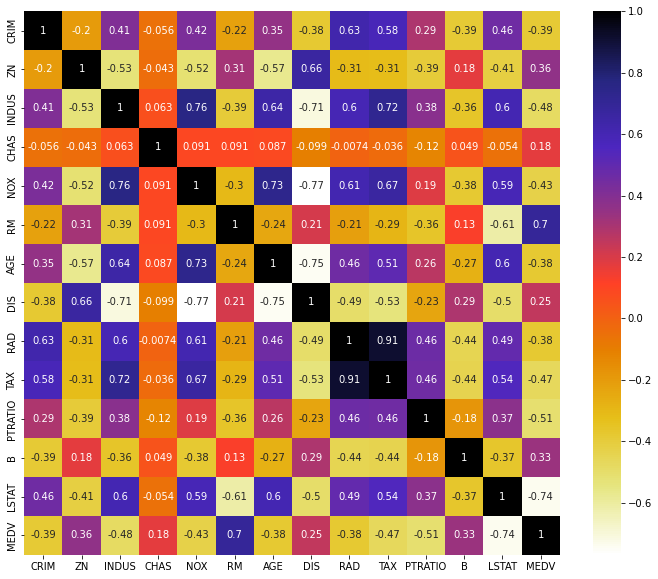

In [52]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = boston.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [53]:
X1 = boston.drop(["MEDV","TAX"],axis=1) # new Feature matrix
y = boston["MEDV"] #target variable
X1.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,18.7,396.90,5.33
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,18.7,394.12,5.21
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,15.2,395.60,12.43
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,15.2,396.90,19.15
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,15.2,386.63,29.93
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,15.2,386.71,17.10


In [54]:
y.head(10)

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
5    28.7
6    22.9
7    27.1
8    16.5
9    18.9
Name: MEDV, dtype: float64

### Visualizing relationships of different feature columns wrt Y.

*Here we have used sns.regplot to plot the graphs of individual feature column against out Target variable*

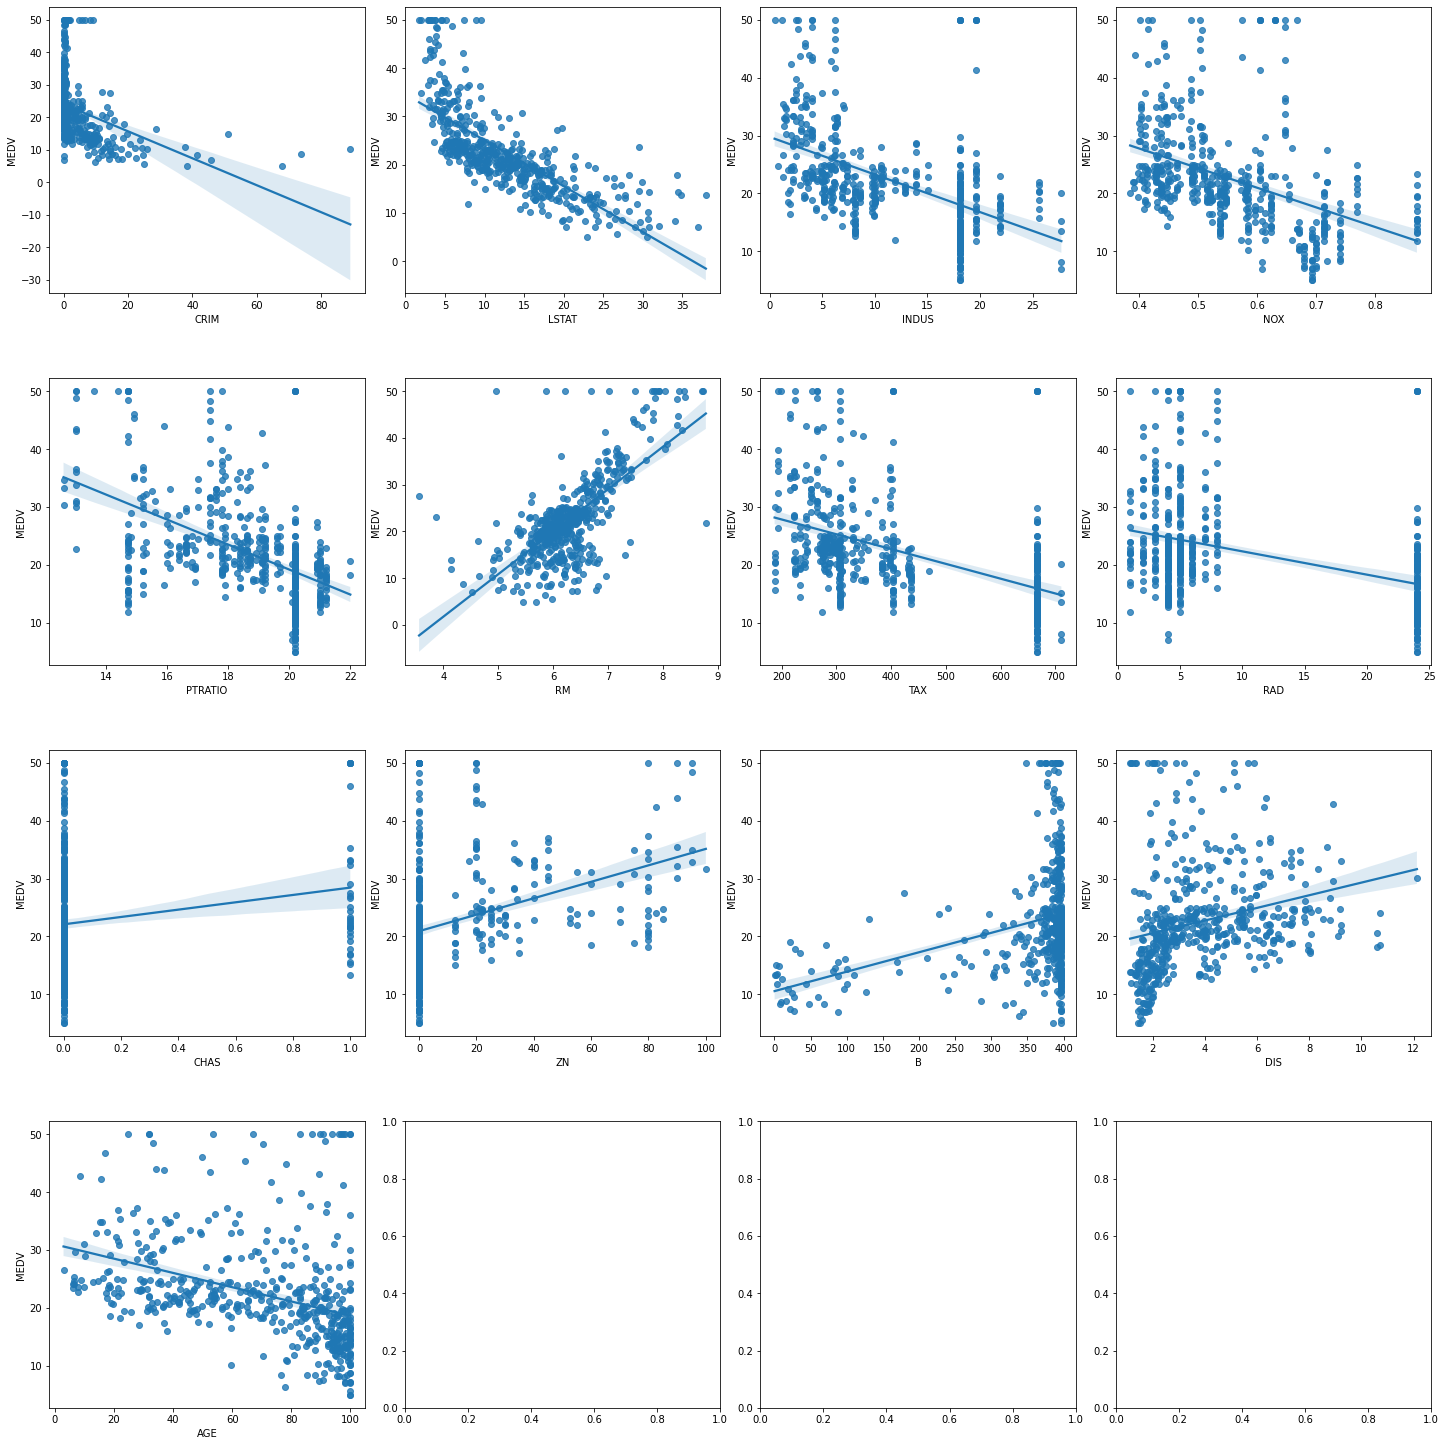

In [55]:
x_feature = ["CRIM",'LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', "RAD","CHAS",'ZN','B','DIS', 'AGE']
x = boston.loc[:,x_feature]
y = boston['MEDV']
x = pd.DataFrame(data=x, columns=x_feature)
fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(20, 20))
index = 0
axs = axs.flatten()
for i, k in enumerate(x_feature):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)



#### Seeing some relationships between features

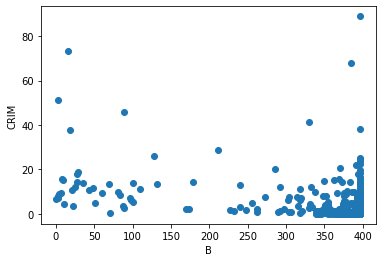

In [56]:
plt.scatter(boston['B'],boston['CRIM'])
plt.ylabel('CRIM')
plt.xlabel('B')
plt.show()


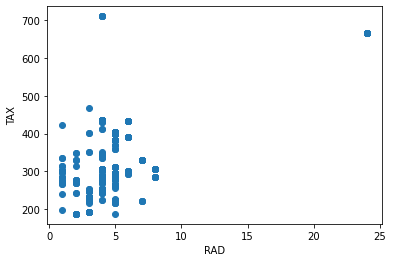

In [57]:
plt.scatter(boston['RAD'],boston['TAX'])
plt.ylabel('TAX')
plt.xlabel('RAD')
plt.show()

**From the above data analysis we can say that the following features are not good features: RAD, TAX , CHAS.
They do not show much dependencies with our dependent variable MEDV
So we remove them out from our training and testing dataset**

### Removing outliers

Removing outliers makes our model better as a more proper fit can be done on the dataset with less errors. Outliers increase error

In [58]:
boston.shape

(506, 14)

In [59]:
max_threshold=boston['RM'].quantile(0.95)
min_threshold=boston['RM'].quantile(0.05)
boston=boston[(boston['RM']>min_threshold) & (boston['RM']<max_threshold)]

max_threshold=boston['LSTAT'].quantile(0.95)
min_threshold=boston['LSTAT'].quantile(0.05)
boston=boston[(boston['LSTAT']>min_threshold) & (boston['LSTAT']<max_threshold)]

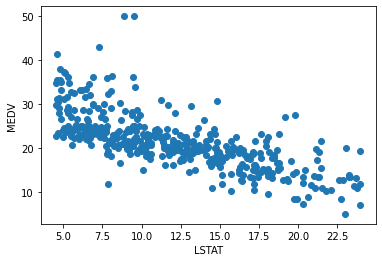

In [60]:
plt.scatter(boston['LSTAT'],boston['MEDV'])
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

In [61]:
boston['LSTAT'].shape

(408,)

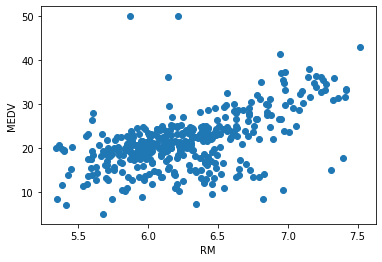

In [62]:
plt.scatter(boston['RM'],boston['MEDV'])
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()

In [63]:
boston['RM'].shape

(408,)



## Univariate Linear Regression:

**with feature as LSTAT**

In [64]:
#creating train-test split
suf_boston = pd.DataFrame.sample(boston,frac=1)
train_size = int(0.7*len(boston))

train_boston = suf_boston[:train_size]
test_boston = suf_boston[train_size:]

In [65]:
print("train_boston: "+str(len(train_boston))+" test_boston:"+str(len(test_boston)))

train_boston: 285 test_boston:123


In [66]:
lstat_train = train_boston.LSTAT
lstat_test = test_boston.LSTAT

y_train = train_boston.MEDV
y_test = test_boston.MEDV

In [67]:
lstat_train.head(10)

397    19.92
19     11.28
238     6.36
250     5.90
95      6.65
342     8.65
449    19.31
476    18.68
502     9.08
130    12.60
Name: LSTAT, dtype: float64

## Cost function and Gradient descent(univariate)

In [68]:
#calculating mean squared error
def cost_function(y_true,y_pred):
    cost = np.sum((y_pred-y_true)**2)/len(y_true)
    return cost

#gradient descent

def gradient_descent(x, y, iterations, learning_rate,threshold = 1e-6):
    curr_weight = 1.00
    curr_bias = 20.00   
    it = iterations
    alpha = learning_rate
    n = float(len(x))
    
    costs = [] # We store our costs per iterations in this array
    weights = [] # We store our weights per iterations in this array
    previous_cost = None
    
    for i in range(it):
        y_pred = (curr_weight*x) + curr_bias
        
        curr_cost = cost_function(y, y_pred)
        
        if previous_cost and abs(previous_cost-curr_cost)<=threshold:
            break
            
        previous_cost = curr_cost
        costs.append(curr_cost)
        weights.append(curr_weight)
        
        d_weight = -(2/n) *np.sum((y-y_pred)*x) 
        d_bias = -(2/n) * np.sum(y-y_pred)
        
        curr_weight = curr_weight - (alpha * d_weight)
        curr_bias = curr_bias - (alpha * d_bias)
        
        
        # We plot our Cost vs Iterations and Weight vs Iteration graphs
    plt.figure(figsize = (8,6))
    plt.plot(costs)
    plt.title("Cost vs Iterations")
    plt.ylabel("Cost")
    plt.xlabel("Iterations")
    plt.show()

    plt.figure(figsize = (8,6))
    plt.plot(weights)
    plt.title("Weight vs Iterations")
    plt.ylabel("Weight")
    plt.xlabel("Iterations")
    plt.show()
     
    return curr_weight, curr_bias


    
        
        
        
        

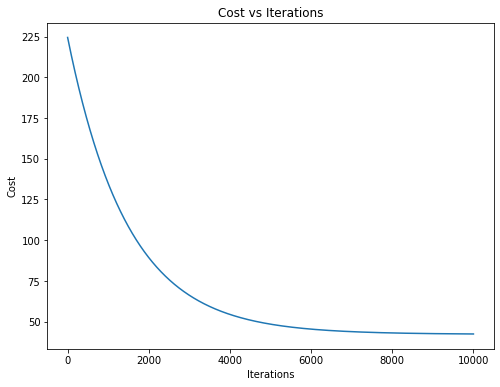

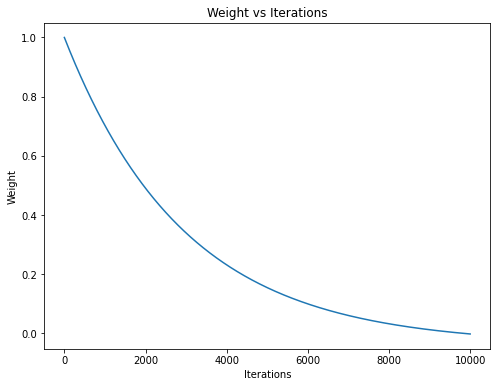

Estimated Weight: -0.0019361824650014072
Estimated Bias: 19.96601613884396


In [69]:
optimum_weight, optimum_bias = gradient_descent(np.array(lstat_train), np.array(y_train), iterations=10000, learning_rate=0.000001)
    
print(f"Estimated Weight: {optimum_weight}\nEstimated Bias: {optimum_bias}")

In [70]:
Y_pred = optimum_weight*lstat_test + optimum_bias
MSE = np.square(y_test-Y_pred).mean()
print("MSE: " ,MSE)

MSE:  43.62190900528494


### Testing against feature RM

In [71]:
#testing agianst feature RM
rm_train = train_boston.RM
rm_test = test_boston.RM

rm_train.head(10)

397    5.747
19     5.727
238    6.481
250    6.487
95     6.625
342    6.540
449    6.417
476    6.484
502    6.120
130    6.458
Name: RM, dtype: float64

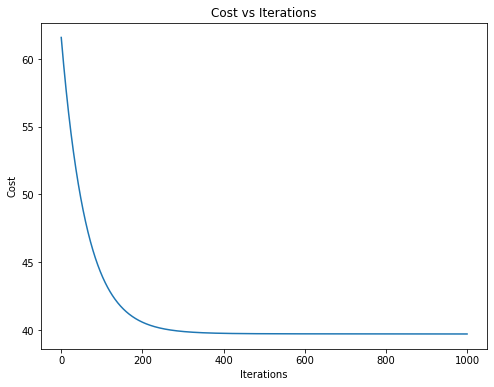

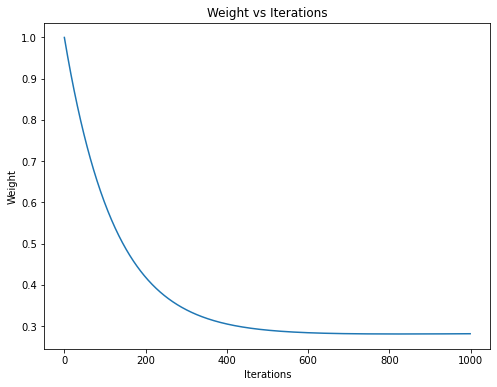

Estimated Weight: 0.28151977539058104
Estimated Bias: 19.838962605349597


In [72]:
optimum_weight, optimum_bias = gradient_descent(np.array(rm_train), np.array(y_train), iterations=1000, learning_rate=0.0001)
    
print(f"Estimated Weight: {optimum_weight}\nEstimated Bias: {optimum_bias}")

In [73]:
Y_pred = optimum_weight*rm_test +optimum_bias
MSE = np.square(y_test-Y_pred).mean()
print("MSE: ",MSE)

MSE:  40.02365976454836


**we test with LSTAT and RM and notice that  with RM we get a slight improvement in the MSE**



## Univariate Linear Regression (closed form)

In [74]:
def closed_form_univariateLR(x,y):
    n  = x.shape
    X = np.c_[x,np.ones(n)]
    Xd = np.dot(X.T,X)
    temp = Xd[0][0]
    Xd[0][0] = Xd[1][1]
    Xd[1][1] = temp
    Xdi = np.linalg.inv(Xd)
    y_sum = np.sum(y)
    xy_sum = np.sum(np.dot(x,y))
    y_mat = np.array([y_sum,xy_sum])
    values = np.dot(Xdi,y_mat.T)
    return values[0] , values[1]


    

In [75]:
 opt_bias , opt_weight = closed_form_univariateLR(rm_train,y_train)
print(f"Estimated Weight: {opt_weight}\nEstimated Bias: {opt_bias}")

Estimated Weight: 7.6418485355032075
Estimated Bias: -26.505748203278507


In [76]:
Y_pred1 = opt_weight*rm_test +opt_bias
MSE = np.square(y_test-Y_pred1).mean()
print("MSE: ",MSE)

MSE:  28.022227286951157


# Multivariate Linear regression

### Data Preprocessing

dropping features which have absolute correlation with MEDV less than 0.5

In [77]:
X = boston.drop(["CRIM", 'NOX', "RAD","CHAS",'INDUS','TAX','ZN','B','DIS', 'AGE','MEDV'], axis=1)
Y = boston['MEDV']
X.head(10)

,RM,PTRATIO,LSTAT
0,6.575,15.3,4.98
1,6.421,17.8,9.14
4,7.147,18.7,5.33
5,6.430,18.7,5.21
6,6.012,15.2,12.43
7,6.172,15.2,19.15
9,6.004,15.2,17.10
10,6.377,15.2,20.45
11,6.009,15.2,13.27
12,5.889,15.2,15.71


**Normalizing the data**

In [78]:
for column in X.columns:
    X[column] = (X[column] - X[column].min()) / (X[column].max() - X[column].min())

X.head(10)

,RM,PTRATIO,LSTAT
0,0.565717,0.287234,0.022634
1,0.494945,0.553191,0.236626
4,0.828585,0.648936,0.040638
5,0.499081,0.648936,0.034465
6,0.306985,0.276596,0.405864
7,0.380515,0.276596,0.751543
9,0.303309,0.276596,0.646091
10,0.474724,0.276596,0.818416
11,0.305607,0.276596,0.449074
12,0.250460,0.276596,0.574588


removing outliers from the features

In [79]:
max_threshold=boston['RM'].quantile(0.95)
min_threshold=boston['RM'].quantile(0.05)
boston=boston[(boston['RM']>min_threshold) & (boston['RM']<max_threshold)]

max_threshold=boston['LSTAT'].quantile(0.95)
min_threshold=boston['LSTAT'].quantile(0.05)
boston=boston[(boston['LSTAT']>min_threshold) & (boston['LSTAT']<max_threshold)]

max_threshold=boston['TAX'].quantile(0.95)
min_threshold=boston['TAX'].quantile(0.05)
boston=boston[(boston['TAX']>min_threshold) & (boston['RM']<max_threshold)]

max_threshold=boston['PTRATIO'].quantile(0.95)
min_threshold=boston['PTRATIO'].quantile(0.05)
boston=boston[(boston['PTRATIO']>min_threshold) & (boston['LSTAT']<max_threshold)]

max_threshold=boston['INDUS'].quantile(0.95)
min_threshold=boston['INDUS'].quantile(0.05)
boston=boston[(boston['INDUS']>min_threshold) & (boston['LSTAT']<max_threshold)]

In [80]:
print(X.shape,Y.shape)

(408, 3) (408,)


Train-Test split

In [81]:
suf_X = pd.DataFrame.sample(X,frac=1)
train_size = int(0.7*len(X))

train_X = suf_X[:train_size]
test_X = suf_X[train_size:]

suf_Y = pd.DataFrame.sample(Y,frac=1)
train_size = int(0.7*len(Y))

train_Y = suf_Y[:train_size]
test_Y = suf_Y[train_size:]

print(train_X.shape, test_X.shape, train_Y.shape, test_Y.shape)
train_X.head(10)

(285, 3) (123, 3) (285,) (123,)


,RM,PTRATIO,LSTAT
177,0.446232,0.425532,0.090021
450,0.645680,0.808511,0.663580
172,0.104779,0.425532,0.522119
308,0.593290,0.617021,0.000000
182,0.832261,0.553191,0.014403
312,0.312040,0.617021,0.369342
1,0.494945,0.553191,0.236626
401,0.459099,0.808511,0.811728
311,0.357537,0.617021,0.074074
287,0.397518,0.425532,0.133745


In [84]:
def gd_multipleLR(x,y,iterations,alpha,threshold):
    n = float(285)
    current_weight = np.ones(3,dtype=float)
    current_bias = np.ones(285,dtype=float)   
    it = iterations
    
    
    costs = []
    previous_cost = None

    current_cost= None
    for i in range(it):
        y_pred = np.dot(x,current_weight) + current_bias
        
        current_cost = cost_function(y, y_pred)
        
        if previous_cost and abs(previous_cost-current_cost)<=threshold:
            break
            
        previous_cost = current_cost
        costs.append(current_cost)
        
        d_weight = np.empty(3,dtype=float)
        k =0
        for column in x:
            d_weight[k] = -(2/n) *np.sum(np.dot((y-y_pred),x[column].values.T))
            k += 1

        d_bias = -(2/n) * np.sum(y-y_pred)

        
        
        current_weight = np.subtract(current_weight,(alpha * d_weight))
        current_bias = current_bias - (alpha * d_bias)
    plt.figure(figsize = (8,6))
    plt.plot(costs)
    plt.title("Cost vs Iterations")
    plt.ylabel("Cost")
    plt.xlabel("Iterations")
    plt.show()

    return current_weight, current_bias
    
    

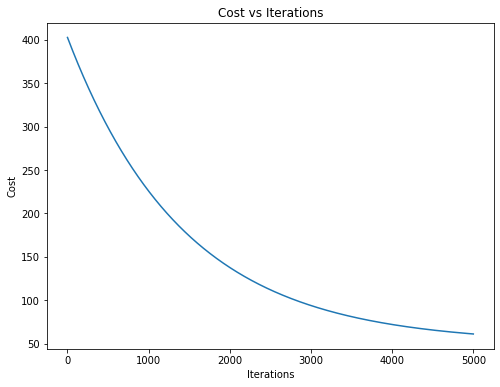

[4.74547607 6.44849738 4.28584505]
10.10831162947361


(3,)

In [85]:
opt_weight, opt_bias = gd_multipleLR(train_X,train_Y,iterations=5000,alpha=0.0001,threshold=1e-6)

print(opt_weight)
print(opt_bias[0])

opt_weight.shape

In [ ]:
Y_pred1 = np.dot(test_X,opt_weight) +opt_bias[0:123]
MSE = np.square(y_test-Y_pred1).mean()
print("MSE: ",MSE)

MSE:  48.56336438265878


# Multivariate Linear regression (closed form)

In [ ]:
def closed_form_multipleLR(x,y):
    n  = len(x)
    X = np.c_[np.ones(n),x]
    Xd = np.dot(X.T,X)
    Xdi = np.linalg.inv(Xd)
    Xdit = np.dot(Xdi,X.T)
    W = np.dot(Xdit,y)
    
    return W

In [ ]:
opt_weight = closed_form_multipleLR(train_X,train_Y)

opt_weight.shape

(6,)

In [ ]:
test_Xd = np.c_[np.ones(len(test_X)),test_X]
Y_pred2 = np.dot(test_Xd,opt_weight)
MSE = np.square(y_test-Y_pred2).mean()
print("MSE: ",MSE)

MSE:  33.64947055343595
